In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

# Instead of 'from keras.utils import np_utils', use this:
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
import os
import random
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
def get_ASL_paths(path):
    All_images_paths = []
    labels = []
    for Cancertype in tqdm(os.listdir(path)):
        Cancertype_path = os.path.join(path,Cancertype) # types = cll, fl, mcl
        for img in os.listdir(Cancertype_path): # images
            img_path = os.path.join(Cancertype_path,img)
            All_images_paths.append(img_path)
            if(Cancertype=="all_benign"):
                labels.append(0)
            elif(Cancertype=="all_early"):
                labels.append(1)
            elif(Cancertype=="all_pre"):
                labels.append(2)
            else:
                labels.append(3)

    return All_images_paths, labels
def PathToImage(image_paths, width=128, height=128):
    images = np.zeros( (len(image_paths), width, height, 3), dtype=np.ubyte)

    for i,image_path in enumerate(tqdm(image_paths)) :
        image_array = cv2.imread(image_path)
        image_resized = cv2.resize(image_array,(width,height))
        images[i,:,:,:] = image_resized
    return images

def DenseToSparse(labels):
    labels = sorted(labels)
    labels = pd.Series(labels)
    labels = labels.astype(np.ubyte)
    sparse_labels = np.zeros((labels.shape[0], 4))
    sparse_labels[labels.index,labels] = 1
    return sparse_labels

In [ ]:
dataset_path = "/content/drive/MyDrive/Multi Cancer/Multi Cancer/ALL"
images_paths, labels = get_ASL_paths(dataset_path)
images = PathToImage(images_paths, 64, 64)

100%|██████████| 20027/20027 [1:40:47<00:00,  3.31it/s]


In [ ]:
sparse_labels = DenseToSparse(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, sparse_labels, test_size=0.25, random_state=42, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.20) # , random_state=40, shuffle=True)

In [ ]:
model = Sequential()

model.add(Convolution2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learning_rates = [0.5, 0.3, 0.15, 0.07, 0.05, 0.03, 0.01]
lr = learning_rates[2]
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
save_path = 'classification_CNN.h5'
try:
    history = model.fit(x_train, y_train, epochs= 30, validation_data=(x_valid, y_valid), batch_size = 256)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 32s 516ms/step - accuracy: 0.2766 - loss: 13.6405 - val_accuracy: 0.4400 - val_loss: 1.4026
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 508ms/step - accuracy: 0.4941 - loss: 1.2836 - val_accuracy: 0.5878 - val_loss: 1.0095
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 38s 460ms/step - accuracy: 0.5953 - loss: 0.9628 - val_accuracy: 0.5963 - val_loss: 0.9604
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 472ms/step - accuracy: 0.6555 - loss: 0.8440 - val_accuracy: 0.7039 - val_loss: 0.7028
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 493ms/step - accuracy: 0.6974 - loss: 0.7386 - val_accuracy: 0.7441 - val_loss: 0.6222
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 490ms/step - accuracy: 0.6835 - loss: 0.8228 - val_accuracy: 0.7461 - val_loss: 0.6196
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 479ms/step - accuracy: 0.7675 - loss: 0.5626 - val_accuracy: 0.7635 - val_loss: 0.5595
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 499ms/step - accuracy: 0.7865 - loss: 0.5167 - val_acc

In [ ]:
model.evaluate(x_train, y_train, batch_size=256)

59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.9645 - loss: 0.0966


[0.09671146422624588, 0.9659121036529541]

In [ ]:
model.evaluate(x_valid, y_valid, batch_size=256)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9451 - loss: 0.1626


[0.17599532008171082, 0.9413233399391174]

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9367 - loss: 0.1801


[0.18702666461467743, 0.9381237626075745]

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [ ]:
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(y_test,axis=1)
ground
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       253
           1       0.87      0.94      0.90       242
           2       0.93      0.98      0.95       237
           3       0.99      0.98      0.99       270

    accuracy                           0.94      1002
   macro avg       0.94      0.94      0.94      1002
weighted avg       0.94      0.94      0.94      1002



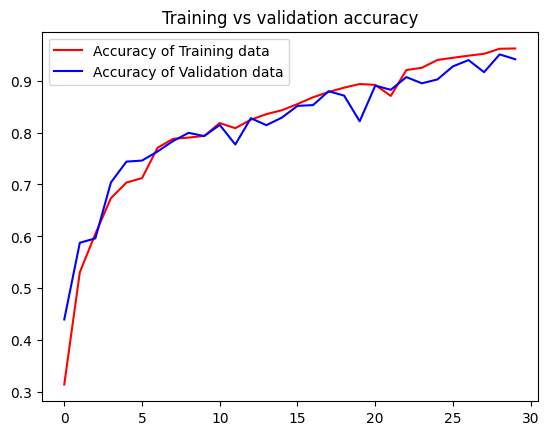

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

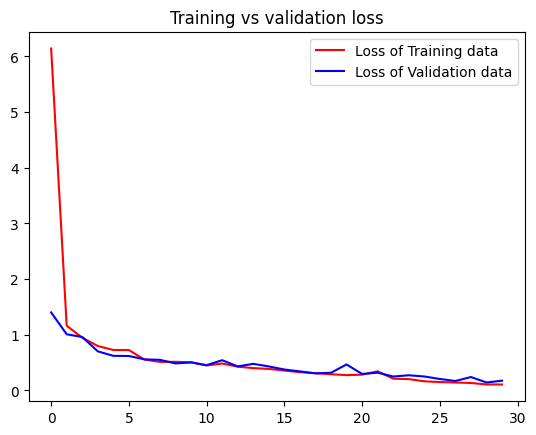

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

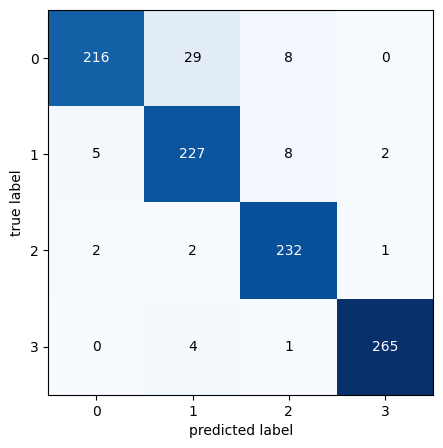

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ground,pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
def get_ASL_paths(path):
    All_images_paths = []
    labels = []
    for Cancertype in tqdm(os.listdir(path)):
        Cancertype_path = os.path.join(path,Cancertype) # types = cll, fl, mcl
        for img in os.listdir(Cancertype_path): # images
            img_path = os.path.join(Cancertype_path,img)
            All_images_paths.append(img_path)
            if(Cancertype=="brain_glioma"):
                labels.append(0)
            elif(Cancertype=="brain_menin"):
                labels.append(1)
            else:
                labels.append(2)

    return All_images_paths, labels
def PathToImage(image_paths, width=128, height=128):
    images = np.zeros( (len(image_paths), width, height, 3), dtype=np.ubyte)

    for i,image_path in enumerate(tqdm(image_paths)) :
        image_array = cv2.imread(image_path)
        image_resized = cv2.resize(image_array,(width,height))
        images[i,:,:,:] = image_resized
    return images

def DenseToSparse(labels):
    labels = sorted(labels)
    labels = pd.Series(labels)
    labels = labels.astype(np.ubyte)
    sparse_labels = np.zeros((labels.shape[0], 3))
    sparse_labels[labels.index,labels] = 1
    return sparse_labels

In [ ]:
dataset_path = "/content/drive/MyDrive/Multi Cancer/Multi Cancer/Brain Cancer"
images_paths, labels = get_ASL_paths(dataset_path)
images = PathToImage(images_paths, 64, 64)

100%|██████████| 15000/15000 [1:08:18<00:00,  3.66it/s]


In [ ]:
sparse_labels = DenseToSparse(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, sparse_labels, test_size=0.25, random_state=42, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.20) # , random_state=40, shuffle=True)

In [ ]:
model = Sequential()

model.add(Convolution2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learning_rates = [0.5, 0.3, 0.15, 0.07, 0.05, 0.03, 0.01]
lr = learning_rates[2]
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
save_path = 'classification_CNN.h5'
try:
    history = model.fit(x_train, y_train, epochs= 30, validation_data=(x_valid, y_valid), batch_size = 256)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 670ms/step - accuracy: 0.4026 - loss: 5.7890 - val_accuracy: 0.5393 - val_loss: 1.1053
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 498ms/step - accuracy: 0.5500 - loss: 1.0627 - val_accuracy: 0.5847 - val_loss: 0.9240
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 509ms/step - accuracy: 0.6027 - loss: 0.8868 - val_accuracy: 0.5917 - val_loss: 0.8603
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 479ms/step - accuracy: 0.6316 - loss: 0.8012 - val_accuracy: 0.6417 - val_loss: 0.7608
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 483ms/step - accuracy: 0.6885 - loss: 0.7131 - val_accuracy: 0.6947 - val_loss: 0.6826
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 42s 506ms/step - accuracy: 0.7368 - loss: 0.6213 - val_accuracy: 0.7333 - val_loss: 0.6180
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 523ms/step - accuracy: 0.7591 - loss: 0.5694 - val_accuracy: 0.7500 - val_loss: 0.5922
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 482ms/step - accuracy: 0.7757 - loss: 0.5363 - val_accu

In [ ]:
model.evaluate(x_train, y_train, batch_size=256)

44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.9624 - loss: 0.1284


[0.1294173002243042, 0.9608888626098633]

In [ ]:
model.evaluate(x_valid, y_valid, batch_size=256)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.8186 - loss: 0.5891


[0.6040554046630859, 0.8073333501815796]

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8041 - loss: 0.6248


[0.58936607837677, 0.809333324432373]

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(y_test,axis=1)
ground
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       243
           1       0.78      0.89      0.83       247
           2       0.80      0.68      0.74       260

    accuracy                           0.81       750
   macro avg       0.81      0.81      0.81       750
weighted avg       0.81      0.81      0.81       750



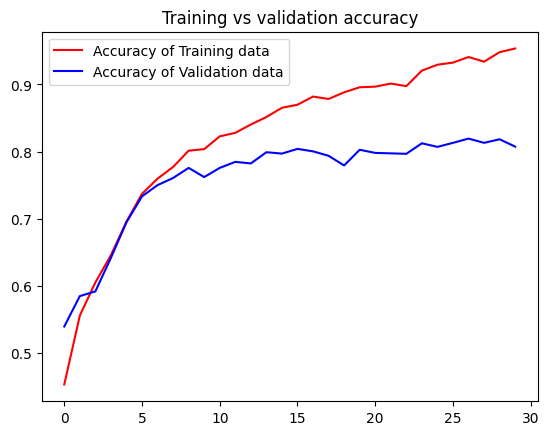

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

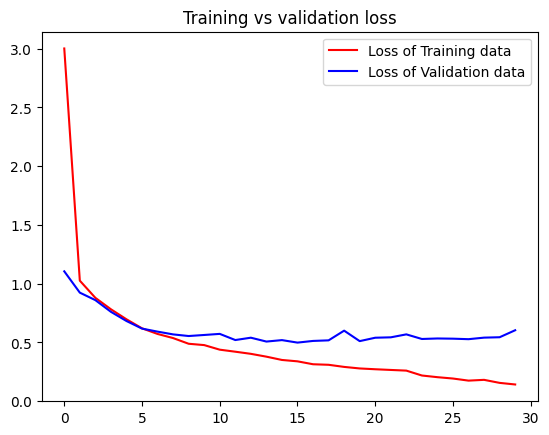

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

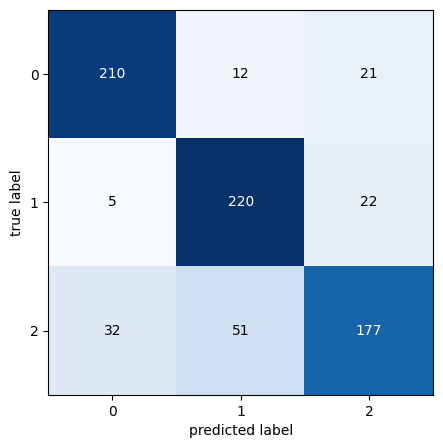

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ground,pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
def get_ASL_paths(path):
    All_images_paths = []
    labels = []
    for Cancertype in tqdm(os.listdir(path)):
        Cancertype_path = os.path.join(path,Cancertype) # types = cll, fl, mcl
        for img in os.listdir(Cancertype_path): # images
            img_path = os.path.join(Cancertype_path,img)
            All_images_paths.append(img_path)
            if(Cancertype=="breast_benign"):
                labels.append(0)
            else:
                labels.append(1)

    return All_images_paths, labels
def PathToImage(image_paths, width=128, height=128):
    images = np.zeros( (len(image_paths), width, height, 3), dtype=np.ubyte)

    for i,image_path in enumerate(tqdm(image_paths)) :
        image_array = cv2.imread(image_path)
        image_resized = cv2.resize(image_array,(width,height))
        images[i,:,:,:] = image_resized
    return images

def DenseToSparse(labels):
    labels = sorted(labels)
    labels = pd.Series(labels)
    labels = labels.astype(np.ubyte)
    sparse_labels = np.zeros((labels.shape[0], 2))
    sparse_labels[labels.index,labels] = 1
    return sparse_labels

In [ ]:
dataset_path = "/content/drive/MyDrive/Multi Cancer/Multi Cancer/Breast Cancer"
images_paths, labels = get_ASL_paths(dataset_path)
images = PathToImage(images_paths, 64, 64)

100%|██████████| 10000/10000 [42:32<00:00,  3.92it/s]


In [ ]:
sparse_labels = DenseToSparse(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, sparse_labels, test_size=0.25, random_state=42, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.20) # , random_state=40, shuffle=True)

In [ ]:
model = Sequential()

model.add(Convolution2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learning_rates = [0.5, 0.3, 0.15, 0.07, 0.05, 0.03, 0.01]
lr = learning_rates[2]
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
save_path = 'classification_CNN.h5'
try:
    history = model.fit(x_train, y_train, epochs= 30, validation_data=(x_valid, y_valid), batch_size = 256)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 497ms/step - accuracy: 0.5023 - loss: 11.0275 - val_accuracy: 0.6620 - val_loss: 1.3751
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 492ms/step - accuracy: 0.7047 - loss: 1.0231 - val_accuracy: 0.7525 - val_loss: 0.7388
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 436ms/step - accuracy: 0.7901 - loss: 0.6175 - val_accuracy: 0.7810 - val_loss: 0.5928
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 497ms/step - accuracy: 0.7951 - loss: 0.5501 - val_accuracy: 0.8025 - val_loss: 0.5284
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 482ms/step - accuracy: 0.8015 - loss: 0.4972 - val_accuracy: 0.8120 - val_loss: 0.5042
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 512ms/step - accuracy: 0.8272 - loss: 0.4435 - val_accuracy: 0.8230 - val_loss: 0.4701
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 481ms/step - accuracy: 0.8250 - loss: 0.4418 - val_accuracy: 0.8035 - val_loss: 0.4656
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 488ms/step - accuracy: 0.8302 - loss: 0.4132 - val_acc

In [ ]:
model.evaluate(x_train, y_train, batch_size=256)

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9526 - loss: 0.1310


[0.13083626329898834, 0.9541333317756653]

In [ ]:
model.evaluate(x_valid, y_valid, batch_size=256)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.8952 - loss: 0.2627


[0.2638290822505951, 0.8964999914169312]

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8929 - loss: 0.3064


[0.3022257089614868, 0.8960000276565552]

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [ ]:
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(y_test,axis=1)
ground
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       242
           1       0.94      0.85      0.89       258

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



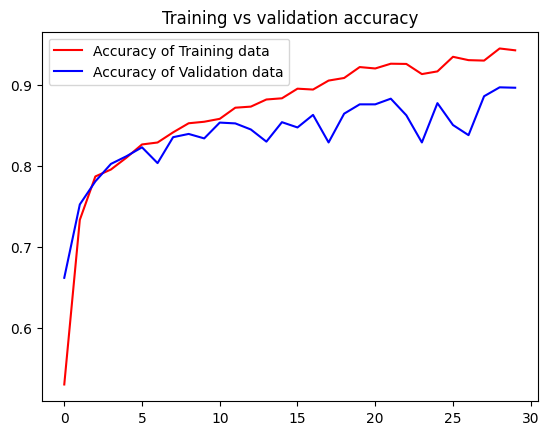

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

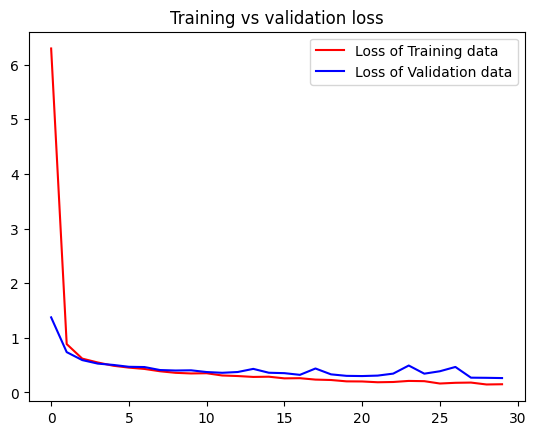

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

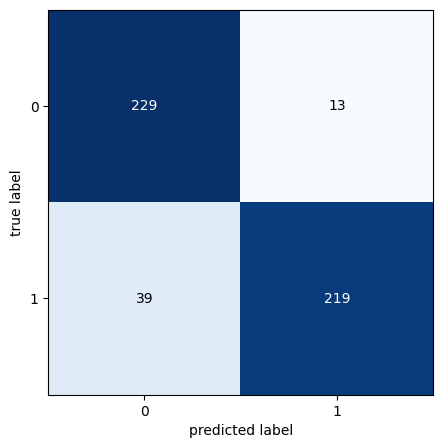

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ground,pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
def get_ASL_paths(path):
    All_images_paths = []
    labels = []
    for Cancertype in tqdm(os.listdir(path)):
        Cancertype_path = os.path.join(path,Cancertype) # types = cll, fl, mcl
        for img in os.listdir(Cancertype_path): # images
            img_path = os.path.join(Cancertype_path,img)
            All_images_paths.append(img_path)
            if(Cancertype=="cervix_dyk"):
                labels.append(0)
            elif(Cancertype=="cervix_koc"):
                labels.append(1)
            elif(Cancertype=="cervix_mep"):
                labels.append(2)
            elif(Cancertype=="cervix_pab"):
                labels.append(3)
            else:
                labels.append(4)

    return All_images_paths, labels
def PathToImage(image_paths, width=128, height=128):
    images = np.zeros( (len(image_paths), width, height, 3), dtype=np.ubyte)

    for i,image_path in enumerate(tqdm(image_paths)) :
        image_array = cv2.imread(image_path)
        image_resized = cv2.resize(image_array,(width,height))
        images[i,:,:,:] = image_resized
    return images

def DenseToSparse(labels):
    labels = sorted(labels)
    labels = pd.Series(labels)
    labels = labels.astype(np.ubyte)
    sparse_labels = np.zeros((labels.shape[0], 5))
    sparse_labels[labels.index,labels] = 1
    return sparse_labels

In [ ]:
dataset_path = "/content/drive/MyDrive /Multi Cancer/Multi Cancer/Cervical Cancer"
images_paths, labels = get_ASL_paths(dataset_path)
images = PathToImage(images_paths, 64, 64)

100%|██████████| 25000/25000 [2:25:29<00:00,  2.86it/s]


In [ ]:
sparse_labels = DenseToSparse(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, sparse_labels, test_size=0.25, random_state=42, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.20) # , random_state=40, shuffle=True)

In [ ]:
model = Sequential()

model.add(Convolution2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(5,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learning_rates = [0.5, 0.3, 0.15, 0.07, 0.05, 0.03, 0.01]
lr = learning_rates[2]
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
save_path = 'classification_CNN.h5'
try:
    history = model.fit(x_train, y_train, epochs= 30, validation_data=(x_valid, y_valid), batch_size = 256)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 514ms/step - accuracy: 0.2536 - loss: 14.5541 - val_accuracy: 0.4876 - val_loss: 1.4837
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 487ms/step - accuracy: 0.5225 - loss: 1.4068 - val_accuracy: 0.5812 - val_loss: 1.1688
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 36s 486ms/step - accuracy: 0.6021 - loss: 1.1117 - val_accuracy: 0.6312 - val_loss: 1.0518
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 478ms/step - accuracy: 0.6449 - loss: 0.9765 - val_accuracy: 0.6510 - val_loss: 0.9288
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 36s 486ms/step - accuracy: 0.6771 - loss: 0.8775 - val_accuracy: 0.6892 - val_loss: 0.8410
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 505ms/step - accuracy: 0.7010 - loss: 0.8050 - val_accuracy: 0.7306 - val_loss: 0.7308
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 36s 482ms/step - accuracy: 0.7469 - loss: 0.6814 - val_accuracy: 0.7520 - val_loss: 0.7087
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 519ms/step - accuracy: 0.7826 - loss: 0.6036 - val_acc

In [ ]:
model.evaluate(x_train, y_train, batch_size=256)

74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9691 - loss: 0.0908


[0.0891619548201561, 0.9708266854286194]

In [ ]:
model.evaluate(x_valid, y_valid, batch_size=256)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.9274 - loss: 0.2139


[0.21556603908538818, 0.9261999726295471]

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9281 - loss: 0.2353


[0.22992324829101562, 0.9264000058174133]

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(y_test,axis=1)
ground
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       250
           1       0.89      0.92      0.90       260
           2       0.94      0.93      0.94       214
           3       0.95      0.90      0.92       265
           4       0.88      0.91      0.89       261

    accuracy                           0.93      1250
   macro avg       0.93      0.93      0.93      1250
weighted avg       0.93      0.93      0.93      1250



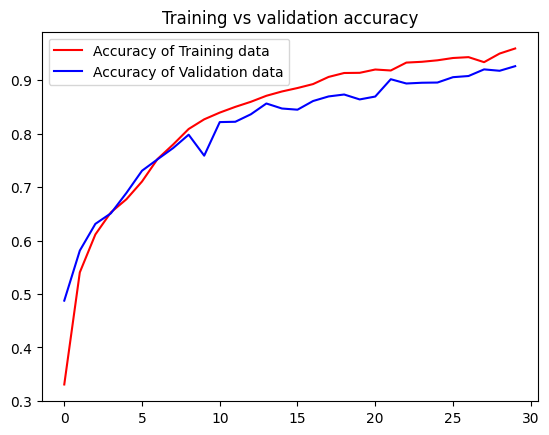

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

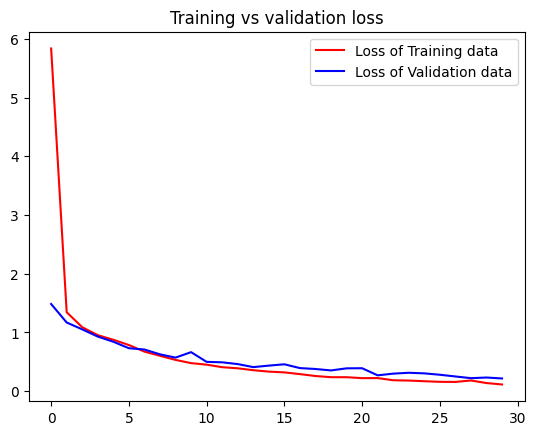

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

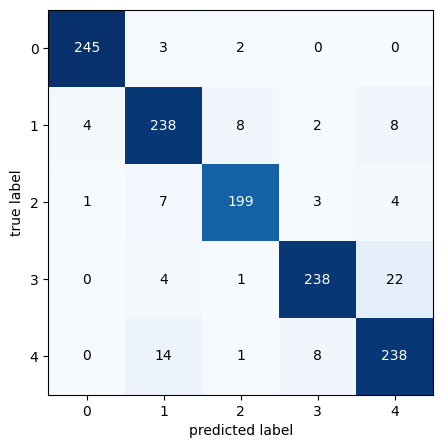

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ground,pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
def get_ASL_paths(path):
    All_images_paths = []
    labels = []
    for Cancertype in tqdm(os.listdir(path)):
        Cancertype_path = os.path.join(path,Cancertype) # types = cll, fl, mcl
        for img in os.listdir(Cancertype_path): # images
            img_path = os.path.join(Cancertype_path,img)
            All_images_paths.append(img_path)
            if(Cancertype=="kidney_normal"):
                labels.append(0)
            else:
                labels.append(1)

    return All_images_paths, labels
def PathToImage(image_paths, width=128, height=128):
    images = np.zeros( (len(image_paths), width, height, 3), dtype=np.ubyte)

    for i,image_path in enumerate(tqdm(image_paths)) :
        image_array = cv2.imread(image_path)
        image_resized = cv2.resize(image_array,(width,height))
        images[i,:,:,:] = image_resized
    return images

def DenseToSparse(labels):
    labels = sorted(labels)
    labels = pd.Series(labels)
    labels = labels.astype(np.ubyte)
    sparse_labels = np.zeros((labels.shape[0], 2))
    sparse_labels[labels.index,labels] = 1
    return sparse_labels

In [ ]:
dataset_path = "/content/drive/MyDrive/Multi Cancer/Multi Cancer/Kidney Cancer"
images_paths, labels = get_ASL_paths(dataset_path)
images = PathToImage(images_paths, 64, 64)

100%|██████████| 10000/10000 [39:03<00:00,  4.27it/s]


In [ ]:
sparse_labels = DenseToSparse(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, sparse_labels, test_size=0.25, random_state=42, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.20) # , random_state=40, shuffle=True)

In [ ]:
model = Sequential()

model.add(Convolution2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learning_rates = [0.5, 0.3, 0.15, 0.07, 0.05, 0.03, 0.01]
lr = learning_rates[2]
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
save_path = 'classification_CNN.h5'
try:
    history = model.fit(x_train, y_train, epochs= 30, validation_data=(x_valid, y_valid), batch_size = 256)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 503ms/step - accuracy: 0.6009 - loss: 6.8012 - val_accuracy: 0.7915 - val_loss: 0.6131
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 489ms/step - accuracy: 0.8718 - loss: 0.3872 - val_accuracy: 0.9410 - val_loss: 0.1657
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 507ms/step - accuracy: 0.9531 - loss: 0.1463 - val_accuracy: 0.9625 - val_loss: 0.1029
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 498ms/step - accuracy: 0.9766 - loss: 0.0736 - val_accuracy: 0.9740 - val_loss: 0.0789
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 454ms/step - accuracy: 0.9877 - loss: 0.0430 - val_accuracy: 0.9795 - val_loss: 0.0633
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 514ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9820 - val_loss: 0.0515
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 511ms/step - accuracy: 0.9953 - loss: 0.0190 - val_accuracy: 0.9835 - val_loss: 0.0445
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 464ms/step - accuracy: 0.9971 - loss: 0.0148 - val_accu

In [ ]:
model.evaluate(x_train, y_train, batch_size=256)

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 1.0000 - loss: 5.3333e-04


[0.0005548600456677377, 1.0]

In [ ]:
model.evaluate(x_valid, y_valid, batch_size=256)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.9939 - loss: 0.0149


[0.019217021763324738, 0.9925000071525574]

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9934 - loss: 0.0179


[0.019271736964583397, 0.9919999837875366]

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(y_test,axis=1)
ground
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       241
           1       1.00      0.98      0.99       259

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



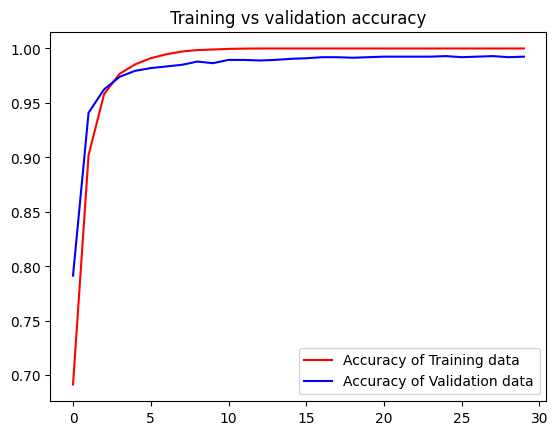

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

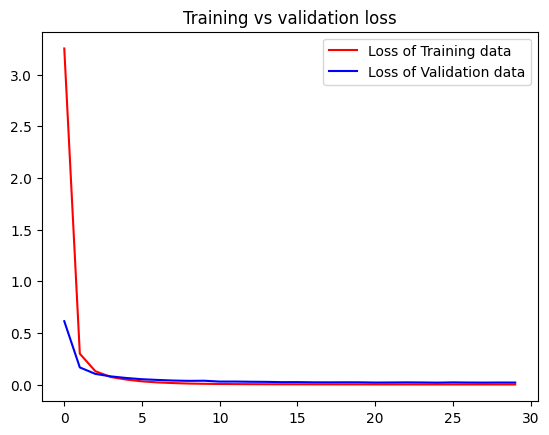

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

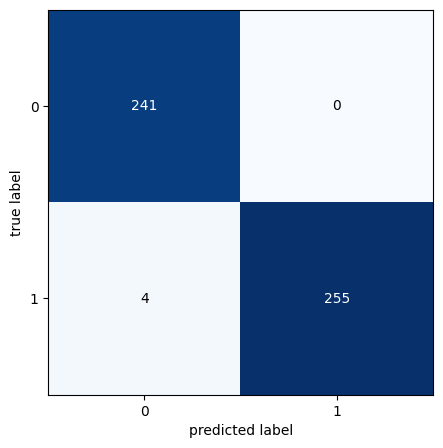

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ground,pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
from tqdm import tqdm
import os
def get_ASL_paths(path):
    All_images_paths = []
    labels = []
    for Cancertype in tqdm(os.listdir(path)):
        Cancertype_path = os.path.join(path,Cancertype) # types = cll, fl, mcl
        for img in os.listdir(Cancertype_path): # images
            img_path = os.path.join(Cancertype_path,img)
            All_images_paths.append(img_path)
            if(Cancertype=="colon_aca"):
                labels.append(0)
            elif(Cancertype=="colon_bnt"):
                labels.append(1)
            elif(Cancertype=="lung_aca"):
                labels.append(2)
            elif(Cancertype=="lung_bnt"):
                labels.append(3)
            else:
                labels.append(4)

    return All_images_paths, labels
def PathToImage(image_paths, width=128, height=128):
    images = np.zeros( (len(image_paths), width, height, 3), dtype=np.ubyte)

    for i,image_path in enumerate(tqdm(image_paths)) :
        image_array = cv2.imread(image_path)
        image_resized = cv2.resize(image_array,(width,height))
        images[i,:,:,:] = image_resized
    return images

def DenseToSparse(labels):
    labels = sorted(labels)
    labels = pd.Series(labels)
    labels = labels.astype(np.ubyte)
    sparse_labels = np.zeros((labels.shape[0], 5))
    sparse_labels[labels.index,labels] = 1
    return sparse_labels

In [ ]:
dataset_path = "/content/drive/MyDrive/Multi Cancer/Multi Cancer/Lung and Colon Cancer"
images_paths, labels = get_ASL_paths(dataset_path)
images = PathToImage(images_paths, 64, 64)

100%|██████████| 25000/25000 [1:39:30<00:00,  4.19it/s]


In [ ]:
sparse_labels = DenseToSparse(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, sparse_labels, test_size=0.25, random_state=42, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.20) # , random_state=40, shuffle=True)

In [ ]:
model = Sequential()

model.add(Convolution2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(5,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learning_rates = [0.5, 0.3, 0.15, 0.07, 0.05, 0.03, 0.01]
lr = learning_rates[2]
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
save_path = 'classification_CNN.h5'
try:
    history = model.fit(x_train, y_train, epochs= 30, validation_data=(x_valid, y_valid), batch_size = 256)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 59s 754ms/step - accuracy: 0.3270 - loss: 11.5374 - val_accuracy: 0.5852 - val_loss: 1.0085
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 576ms/step - accuracy: 0.6345 - loss: 0.8770 - val_accuracy: 0.6884 - val_loss: 0.7092
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 79s 535ms/step - accuracy: 0.7101 - loss: 0.6869 - val_accuracy: 0.6960 - val_loss: 0.6953
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 39s 511ms/step - accuracy: 0.7516 - loss: 0.5859 - val_accuracy: 0.7590 - val_loss: 0.5461
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 494ms/step - accuracy: 0.7822 - loss: 0.5083 - val_accuracy: 0.7826 - val_loss: 0.4836
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 523ms/step - accuracy: 0.7940 - loss: 0.4717 - val_accuracy: 0.7574 - val_loss: 0.5389
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 39s 492ms/step - accuracy: 0.7910 - loss: 0.4914 - val_accuracy: 0.7928 - val_loss: 0.4658
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 510ms/step - accuracy: 0.8263 - loss: 0.4133 - val_acc

In [ ]:
model.evaluate(x_train, y_train, batch_size=256)

74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.8555 - loss: 0.3446


[0.35561755299568176, 0.8508800268173218]

In [ ]:
model.evaluate(x_valid, y_valid, batch_size=256)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.8316 - loss: 0.4601


[0.44946151971817017, 0.8320000171661377]

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.8206 - loss: 0.4655


[0.4580005407333374, 0.8256000280380249]

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(y_test,axis=1)
ground
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.65      0.96      0.77       240
           1       0.92      0.74      0.82       265
           2       0.79      0.97      0.87       255
           3       1.00      0.96      0.98       248
           4       0.94      0.50      0.65       242

    accuracy                           0.83      1250
   macro avg       0.86      0.83      0.82      1250
weighted avg       0.86      0.83      0.82      1250



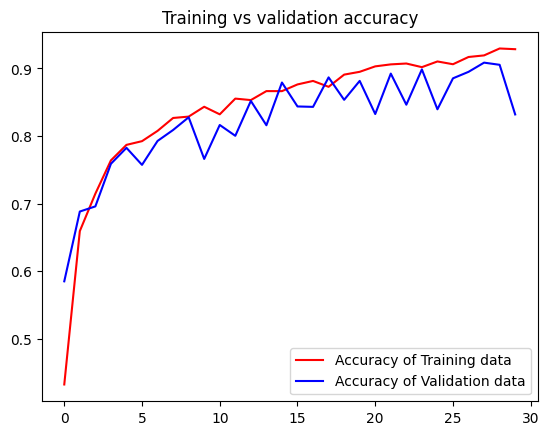

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

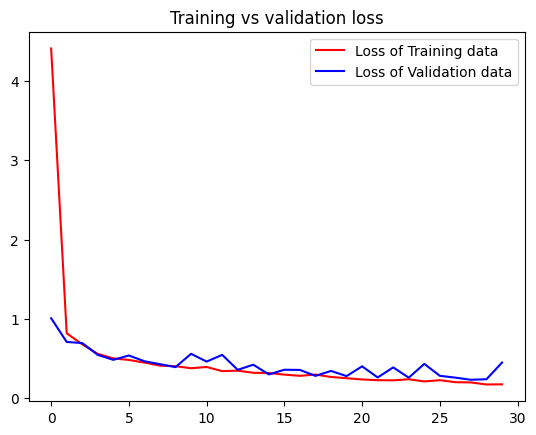

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

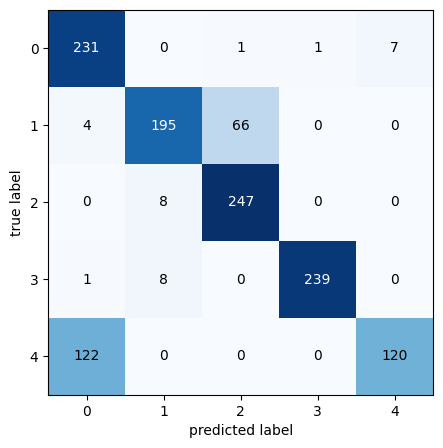

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ground,pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
def get_ASL_paths(path):
    All_images_paths = []
    labels = []
    for Cancertype in tqdm(os.listdir(path)):
        Cancertype_path = os.path.join(path,Cancertype) # types = cll, fl, mcl
        for img in os.listdir(Cancertype_path): # images
            img_path = os.path.join(Cancertype_path,img)
            All_images_paths.append(img_path)
            if(Cancertype=="lymph_cll"):
                labels.append(0)
            elif(Cancertype=="lymph_fl"):
                labels.append(1)
            else:
                labels.append(2)

    return All_images_paths, labels
def PathToImage(image_paths, width=128, height=128):
    images = np.zeros( (len(image_paths), width, height, 3), dtype=np.ubyte)

    for i,image_path in enumerate(tqdm(image_paths)) :
        image_array = cv2.imread(image_path)
        image_resized = cv2.resize(image_array,(width,height))
        images[i,:,:,:] = image_resized
    return images

def DenseToSparse(labels):
    labels = sorted(labels)
    labels = pd.Series(labels)
    labels = labels.astype(np.ubyte)
    sparse_labels = np.zeros((labels.shape[0], 3))
    sparse_labels[labels.index,labels] = 1
    return sparse_labels

In [ ]:
dataset_path = "/content/drive/MyDrive/Multi Cancer/Multi Cancer/Lymphoma"
images_paths, labels = get_ASL_paths(dataset_path)
images = PathToImage(images_paths, 64, 64)

100%|██████████| 15000/15000 [56:27<00:00,  4.43it/s]


In [ ]:
sparse_labels = DenseToSparse(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, sparse_labels, test_size=0.25, random_state=42, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.20) # , random_state=40, shuffle=True)

In [ ]:
model = Sequential()

model.add(Convolution2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learning_rates = [0.5, 0.3, 0.15, 0.07, 0.05, 0.03, 0.01]
lr = learning_rates[2]
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
save_path = 'classification_CNN.h5'
try:
    history = model.fit(x_train, y_train, epochs= 30, validation_data=(x_valid, y_valid), batch_size = 256)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 597ms/step - accuracy: 0.3572 - loss: 5.8490 - val_accuracy: 0.4027 - val_loss: 1.1520
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 516ms/step - accuracy: 0.4530 - loss: 1.1099 - val_accuracy: 0.4660 - val_loss: 1.0389
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 510ms/step - accuracy: 0.4832 - loss: 1.0227 - val_accuracy: 0.4923 - val_loss: 1.0152
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 42s 542ms/step - accuracy: 0.5193 - loss: 0.9701 - val_accuracy: 0.5260 - val_loss: 0.9668
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 480ms/step - accuracy: 0.5418 - loss: 0.9362 - val_accuracy: 0.5533 - val_loss: 0.9251
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 542ms/step - accuracy: 0.5800 - loss: 0.8688 - val_accuracy: 0.6043 - val_loss: 0.8044
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 487ms/step - accuracy: 0.6452 - loss: 0.7420 - val_accuracy: 0.6827 - val_loss: 0.7309
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 742ms/step - accuracy: 0.6672 - loss: 0.6998 - val_accu

In [ ]:
model.evaluate(x_train, y_train, batch_size=256)

44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.9180 - loss: 0.2026


[0.20292742550373077, 0.9173333048820496]

In [ ]:
model.evaluate(x_valid, y_valid, batch_size=256)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.8893 - loss: 0.2778


[0.28082510828971863, 0.8880000114440918]

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8755 - loss: 0.3364


[0.3138851821422577, 0.8759999871253967]

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [ ]:
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(y_test,axis=1)
ground
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       265
           1       0.87      0.78      0.83       232
           2       0.89      0.91      0.90       253

    accuracy                           0.88       750
   macro avg       0.88      0.87      0.87       750
weighted avg       0.88      0.88      0.87       750



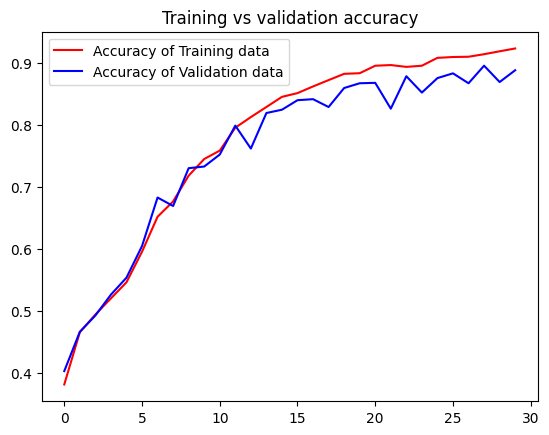

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

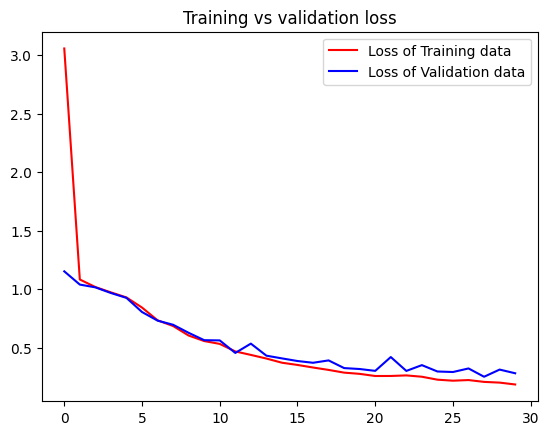

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

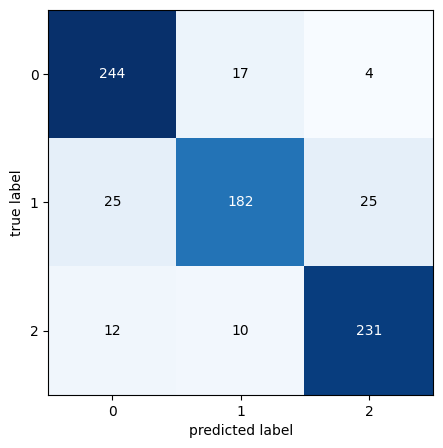

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ground,pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
def get_ASL_paths(path):
    All_images_paths = []
    labels = []
    for Cancertype in tqdm(os.listdir(path)):
        Cancertype_path = os.path.join(path,Cancertype) # types = cll, fl, mcl
        for img in os.listdir(Cancertype_path): # images
            img_path = os.path.join(Cancertype_path,img)
            All_images_paths.append(img_path)
            if(Cancertype=="oral_normal"):
                labels.append(0)
            else:
                labels.append(1)

    return All_images_paths, labels
def PathToImage(image_paths, width=128, height=128):
    images = np.zeros( (len(image_paths), width, height, 3), dtype=np.ubyte)

    for i,image_path in enumerate(tqdm(image_paths)) :
        image_array = cv2.imread(image_path)
        image_resized = cv2.resize(image_array,(width,height))
        images[i,:,:,:] = image_resized
    return images

def DenseToSparse(labels):
    labels = sorted(labels)
    labels = pd.Series(labels)
    labels = labels.astype(np.ubyte)
    sparse_labels = np.zeros((labels.shape[0], 2))
    sparse_labels[labels.index,labels] = 1
    return sparse_labels

In [ ]:
dataset_path = "/content/drive/MyDrive/Multi Cancer/Multi Cancer/Oral Cancer"
images_paths, labels = get_ASL_paths(dataset_path)
images = PathToImage(images_paths, 64, 64)

100%|██████████| 10002/10002 [27:03<00:00,  6.16it/s]


In [ ]:
sparse_labels = DenseToSparse(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, sparse_labels, test_size=0.25, random_state=42, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.20) # , random_state=40, shuffle=True)

In [ ]:
model = Sequential()

model.add(Convolution2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Convolution2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learning_rates = [0.5, 0.3, 0.15, 0.07, 0.05, 0.03, 0.01]
lr = learning_rates[2]
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
save_path = 'classification_CNN.h5'
try:
    history = model.fit(x_train, y_train, epochs= 30, validation_data=(x_valid, y_valid), batch_size = 256)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 500ms/step - accuracy: 0.4924 - loss: 12.2814 - val_accuracy: 0.5300 - val_loss: 1.2996
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 508ms/step - accuracy: 0.5366 - loss: 1.0884 - val_accuracy: 0.5370 - val_loss: 0.8162
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 531ms/step - accuracy: 0.5336 - loss: 0.8146 - val_accuracy: 0.5400 - val_loss: 0.7625
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 521ms/step - accuracy: 0.5504 - loss: 0.7563 - val_accuracy: 0.5520 - val_loss: 0.7302
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 527ms/step - accuracy: 0.5679 - loss: 0.7283 - val_accuracy: 0.5465 - val_loss: 0.7289
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 515ms/step - accuracy: 0.5822 - loss: 0.6970 - val_accuracy: 0.5685 - val_loss: 0.7001
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 498ms/step - accuracy: 0.5843 - loss: 0.6882 - val_accuracy: 0.5660 - val_loss: 0.6969
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 522ms/step - accuracy: 0.5944 - loss: 0.6793 - val_acc

In [ ]:
model.evaluate(x_train, y_train, batch_size=256)

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.6955 - loss: 0.5700


[0.5532249808311462, 0.7065724730491638]

In [ ]:
model.evaluate(x_valid, y_valid, batch_size=256)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.6611 - loss: 0.6468


[0.6577113270759583, 0.656000018119812]

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.6815 - loss: 0.6165


[0.6233686804771423, 0.6746506690979004]

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [ ]:
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(y_test,axis=1)
ground
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61       246
           1       0.64      0.82      0.72       255

    accuracy                           0.67       501
   macro avg       0.69      0.67      0.67       501
weighted avg       0.69      0.67      0.67       501



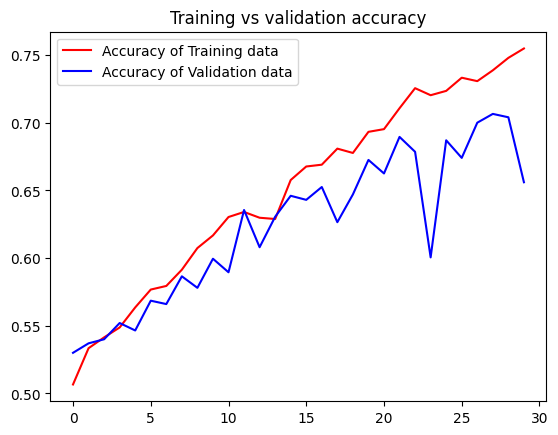

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

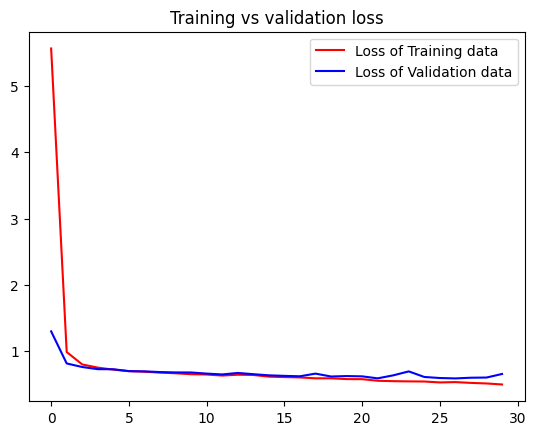

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

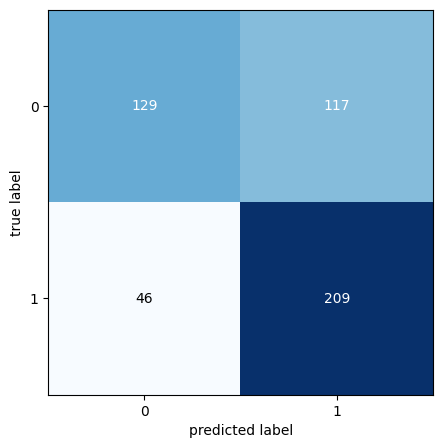

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ground,pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()